<a href="https://colab.research.google.com/github/VasoMtsituri/google_colab/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x = np.random.rand(100, 1)

In [0]:
y = 4 + 3*x + np.random.randn(100, 1)

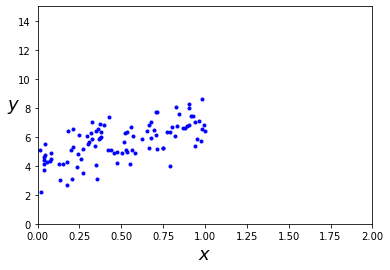

In [4]:
plt.plot(x, y, '.b')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
ax = plt.axis([0,2,0,15])

In [0]:
x_b = np.c_[np.ones((100, 1)), x]

In [0]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [7]:
theta_best

array([[4.26764994],
       [2.78649898]])

In [0]:
def cost_f(theta, x, y):
  m = len(y)
  pred = x.dot(theta)
  cost_value = np.sum(np.square(pred - y))
  
  return cost_value

In [0]:
def gradient_descent(x, y, theta, alpha=0.05, iter_n=1500):
  m = len(y)
  cost_h = np.zeros(iter_n)
  theta_h = np.zeros((iter_n, 2))

  for iter in range(iter_n):
    pred = np.dot(x, theta)
    theta -= 1/m * alpha * (x.T.dot(pred - y))
    theta_h[iter:] = theta.T
    cost_h[iter] = cost_f(theta, x, y)

  return theta, cost_h, theta_h

In [0]:
theta = np.random.randn(2,1)

x_b = np.c_[np.ones((len(x),1)), x]
theta, cost_h, theta_h = gradient_descent(x_b,y,theta)

In [11]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_h[-1]))

Theta0:          4.271,
Theta1:          2.781
Final cost/MSE:  97.411


# Stochastic Gradient Descent

In [0]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_f(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [0]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

In [0]:
X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

In [15]:
print('Theta0: {:0.3f},\nTheta1: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE: {:0.3f}'.format(cost_history[-1]))

Theta0: 4.149,
Theta1: 2.999
Final cost/MSE: 70.938
